# Census Income Project<br><br><br>

**Problem Statement:**<br>


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year. <br><br>

**Description of fnlwgt (final weight)**<br><br>
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:<br>

1. A single cell estimate of the population 16+ for each state.

2. Controls for Hispanic Origin by age and sex.

3. Controls by Race, age and sex.<br><br>

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.
<br><br><br>

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
df=pd.read_csv("census_dataset")

### Exploratory Data Analysis

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


This shows the first five rows of the dataset.

In [4]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


This shows the last five rows of the dataset.

In [5]:
df.shape

(32560, 15)

There are 32560 rows and 15 columns in the dataset.

In [6]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

We can see the names of all columns of the dataset here.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


This describes the information of the the columns of the dataset. It shows the column names, count and datatype.

In [8]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

We can see that there are no null values in the dataset.

In [9]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


We can see the statistical description of the data here.

In [10]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))
#correcting the scientific values in the statistical description

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.00000,32560.00000,32560.00000,32560.00000,32560.00000,32560.00000
mean,38.58163,189781.81437,10.08059,1077.61517,87.30651,40.43747
std,13.64064,105549.76492,2.57271,7385.40300,402.96612,12.34762
min,17.00000,12285.00000,1.00000,0.00000,0.00000,1.00000
25%,28.00000,117831.50000,9.00000,0.00000,0.00000,40.00000
50%,37.00000,178363.00000,10.00000,0.00000,0.00000,40.00000
75%,48.00000,237054.50000,12.00000,0.00000,0.00000,45.00000
max,90.00000,1484705.00000,16.00000,99999.00000,4356.00000,99.00000


As there were statistical values, corrected them here. In this, we can see the statistical information of the dataset

**Correlation**

In [11]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


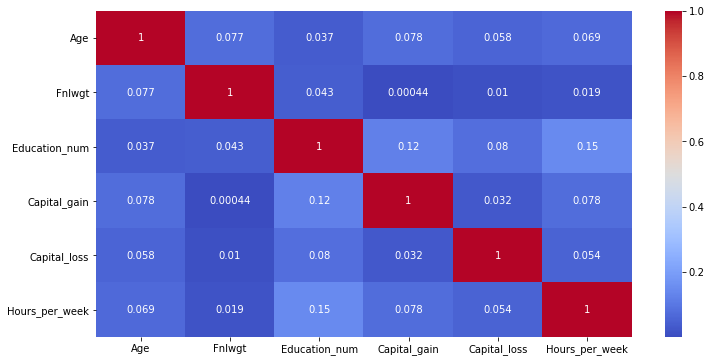

In [12]:
data_corr = df.corr().abs()
plt.figure(figsize=(12, 6))
sns.heatmap(data_corr, annot=True,cmap='coolwarm')
plt.show()

We can see the correlation between the columns of the dataset. Only correlation between numerical columns are displayed in heatmap.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>,
        <AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>],
       [<AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

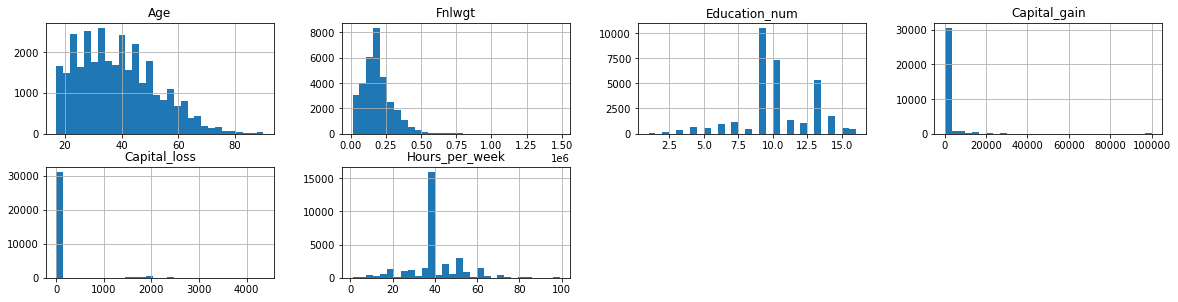

In [13]:
df.hist(figsize=(20,10), grid=True, layout=(4, 4), bins = 30)

Histogram visualisation for each attribute showing what kind of distribution it is.

**Checking unique values**

In [14]:
df['Workclass'].nunique()

9

In [15]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

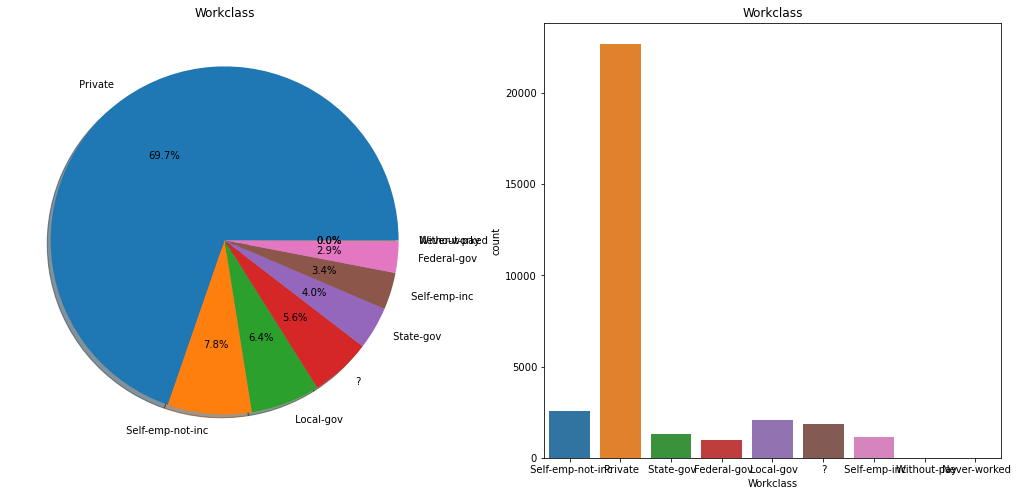

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Workclass'].value_counts().plot.pie(autopct='%2.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Workclass')
ax[0].set_ylabel('')
sns.countplot('Workclass',data=df,ax=ax[1])
ax[1].set_title('Workclass')
plt.show()

We can see that the most of the people are from Private Workclass

In [17]:
df['Education'].nunique()

16

In [18]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

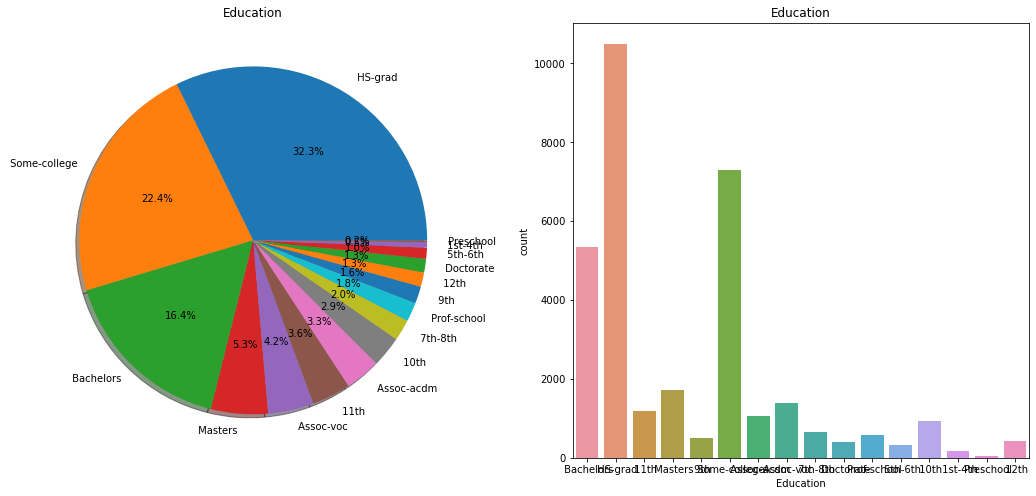

In [19]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Education'].value_counts().plot.pie(autopct='%2.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Education')
ax[0].set_ylabel('')
sns.countplot('Education',data=df,ax=ax[1])
ax[1].set_title('Education')
plt.show()

We can see that number of people in Education are high in HS-grad followed by Some-college and Bachelors.

In [20]:
df['Occupation'].nunique()

15

In [21]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

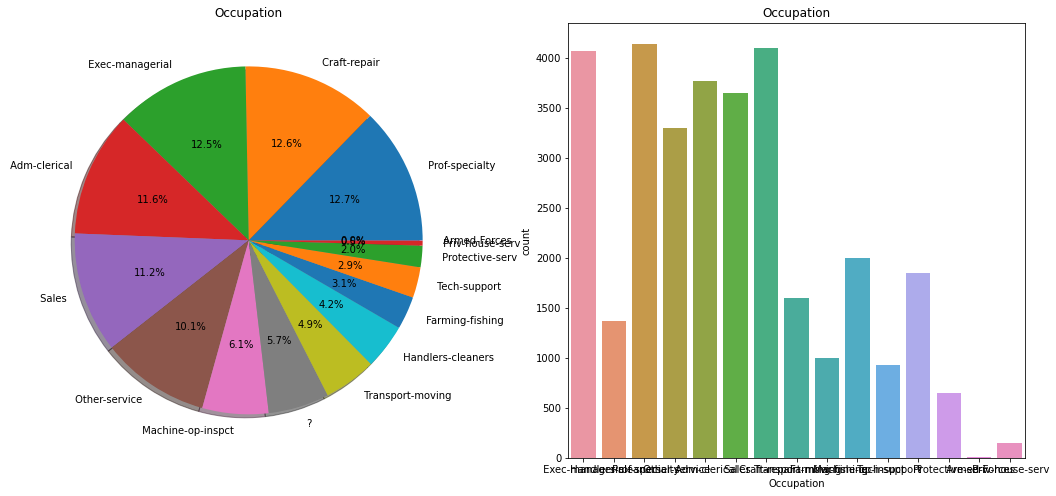

In [22]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Occupation'].value_counts().plot.pie(autopct='%2.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Occupation')
ax[0].set_ylabel('')
sns.countplot('Occupation',data=df,ax=ax[1])
ax[1].set_title('Occupation')
plt.show()

We can see that the number of people are almost equally distributed in all the Occupations while the number of people Armed-Forces being the least.

In [23]:
df['Relationship'].nunique()

6

In [24]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

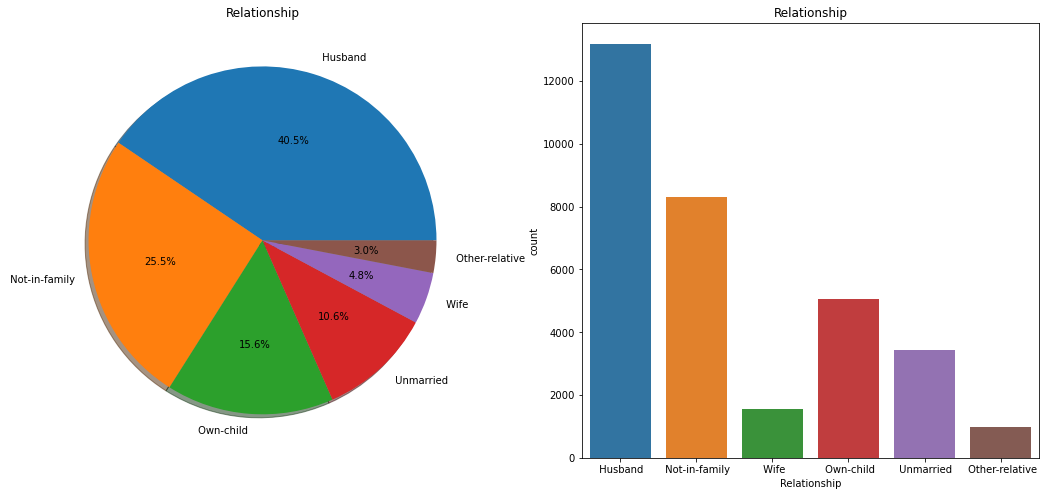

In [25]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Relationship'].value_counts().plot.pie(autopct='%2.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Relationship')
ax[0].set_ylabel('')
sns.countplot('Relationship',data=df,ax=ax[1])
ax[1].set_title('Relationship')
plt.show()

The number of people is high in Husband, Not-in-family while the least is in Wife and Other-relative.  

In [26]:
df['Race'].nunique()

5

In [27]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

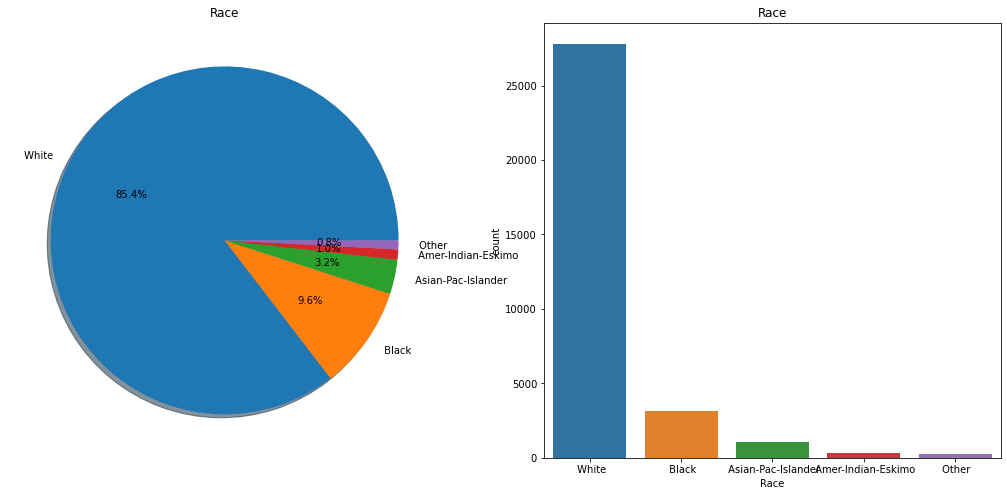

In [28]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Race'].value_counts().plot.pie(autopct='%2.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Race')
ax[0].set_ylabel('')
sns.countplot('Race',data=df,ax=ax[1])
ax[1].set_title('Race')
plt.show()

There are more people of White Race followed by Black Race while the number of people of Other Race being the least.

In [29]:
df['Sex'].nunique()

2

In [30]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

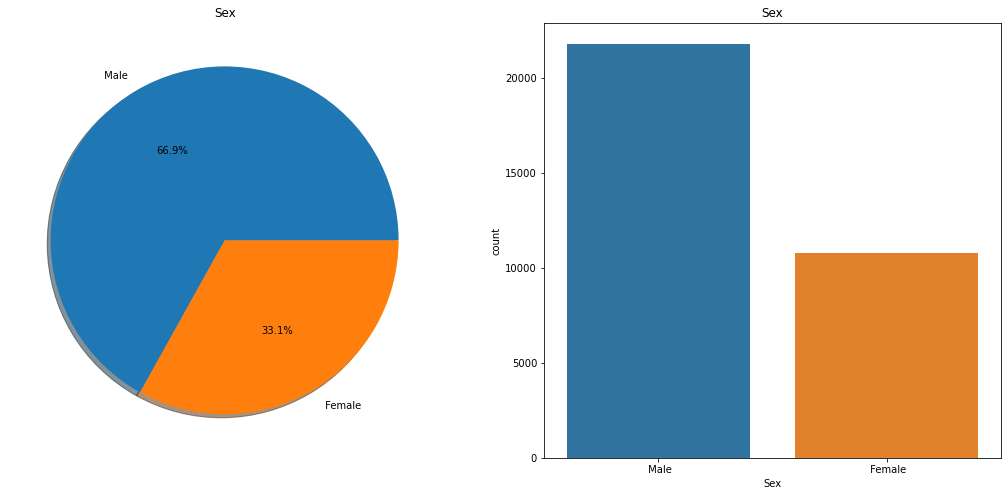

In [31]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Sex'].value_counts().plot.pie(autopct='%2.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Sex')
ax[0].set_ylabel('')
sns.countplot('Sex',data=df,ax=ax[1])
ax[1].set_title('Sex')
plt.show()

There are 66.9% Male population and the female polulation is 33.1% in the survey

In [32]:
df['Native_country'].nunique()

42

In [33]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

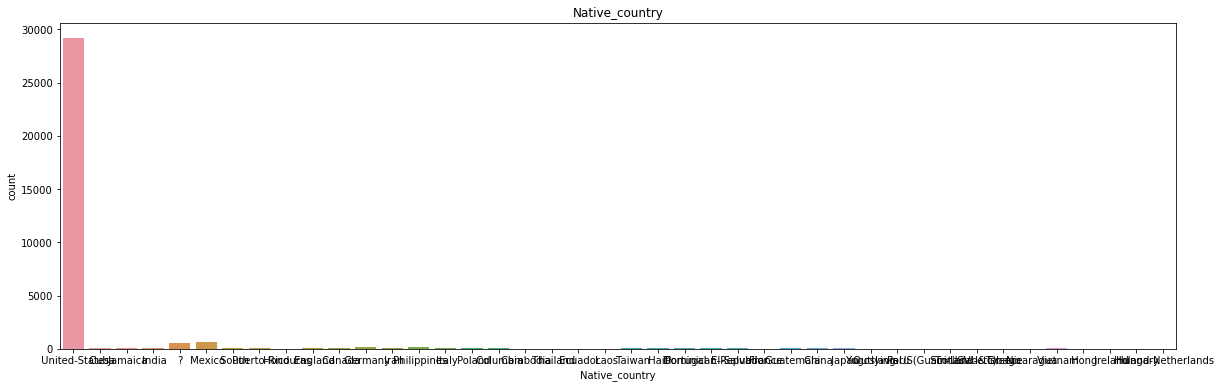

In [34]:
plt.subplots(figsize=(20,6))
sns.countplot('Native_country',data=df)
plt.title('Native_country')
plt.show()

We can see that there are more people with Native_country 'United-States' in the survey.

In [35]:
df['Income'].nunique()

2

In [36]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

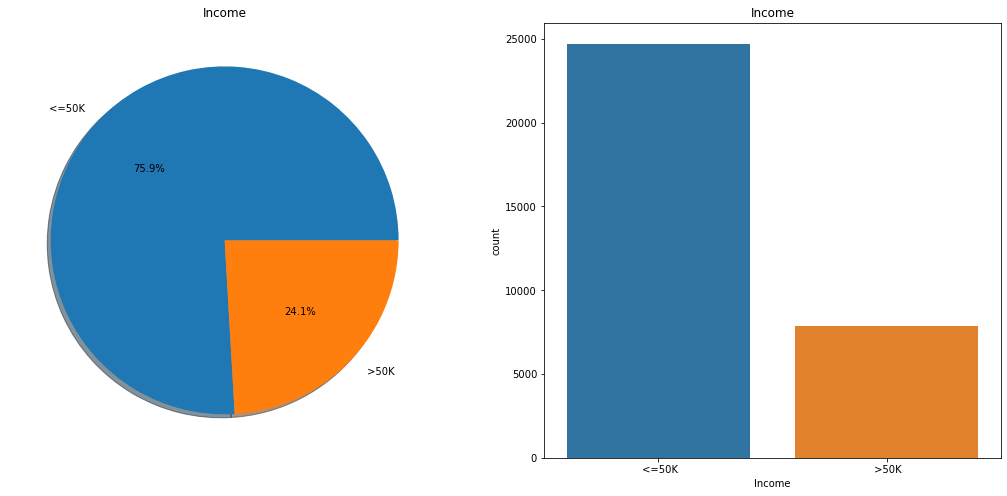

In [37]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Income'].value_counts().plot.pie(autopct='%2.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income')
ax[0].set_ylabel('')
sns.countplot('Income',data=df,ax=ax[1])
ax[1].set_title('Income')
plt.show()

There are 75.9% population with Income less than or equal to 50K and 24.1% population with income greater than 50K.

**Checking how Categorical data varies with Income**

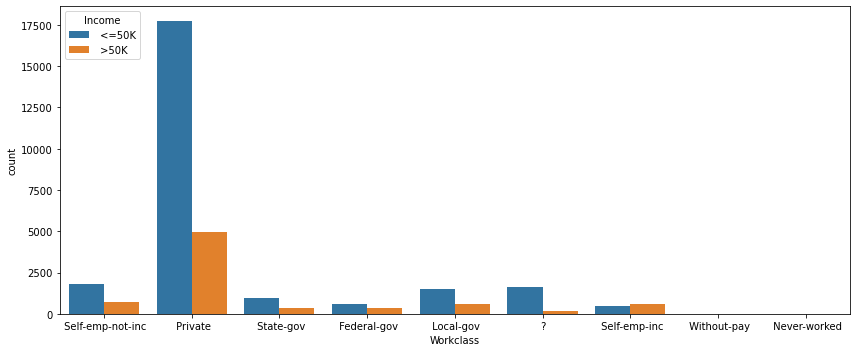

In [38]:
fig = plt.figure(figsize=(12,5))
sns.countplot('Workclass', hue='Income', data=df)
plt.tight_layout()
plt.show()

We can see the distribution of Income in various classes of Workclass here.

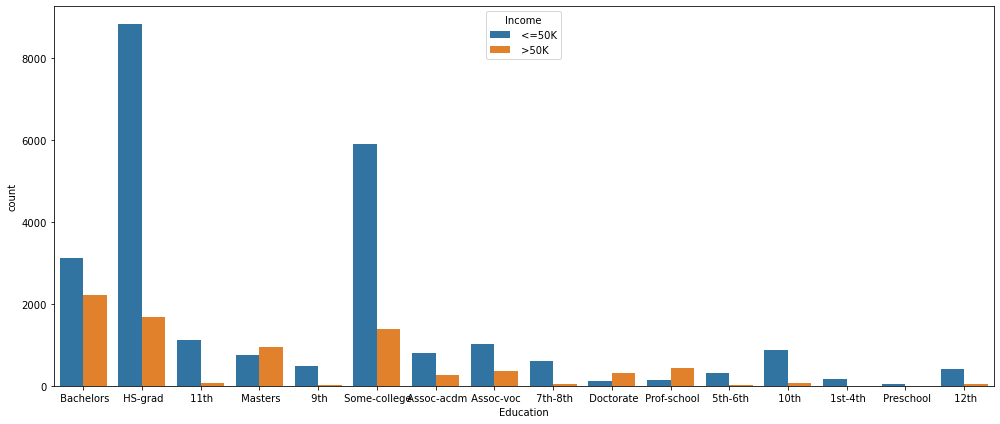

In [39]:
fig = plt.figure(figsize=(14,6))
sns.countplot('Education', hue='Income', data=df)
plt.tight_layout()
plt.show()

We can see the distribution of Income based on various fields of Education of population here.

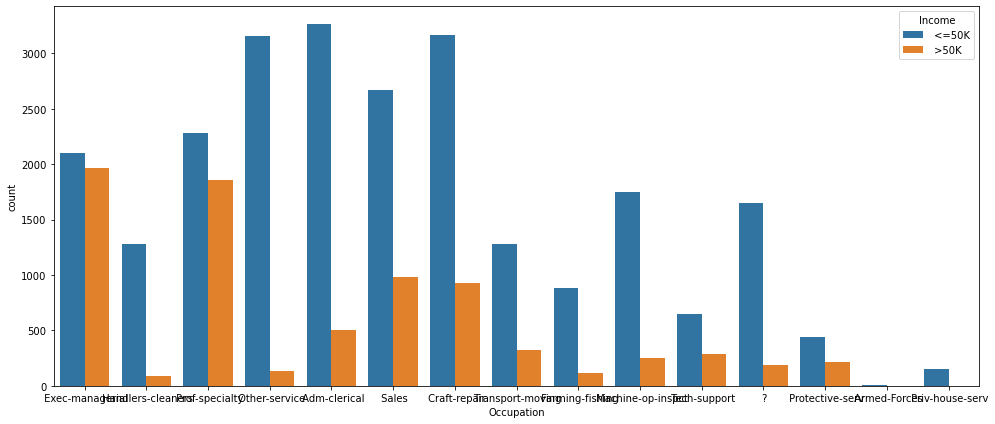

In [40]:
fig = plt.figure(figsize=(14,6))
sns.countplot('Occupation', hue='Income', data=df)
plt.tight_layout()
plt.show()

We can see the distribution of Income in various Occupations here.

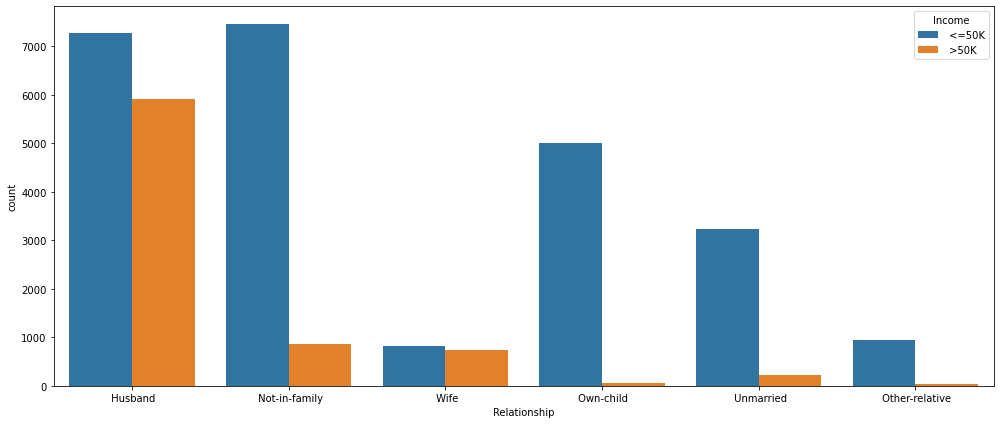

In [41]:
fig = plt.figure(figsize=(14,6))
sns.countplot('Relationship', hue='Income', data=df)
plt.tight_layout()
plt.show()

We can see the distribution of Income based on the Relationship status here.

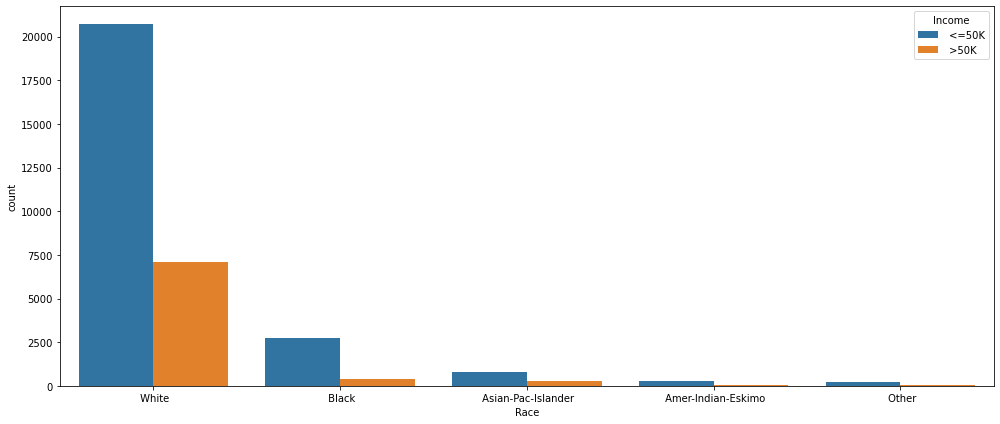

In [42]:
fig = plt.figure(figsize=(14,6))
sns.countplot('Race', hue='Income', data=df)
plt.tight_layout()
plt.show()

We can see the distribution of Income in different Races here.

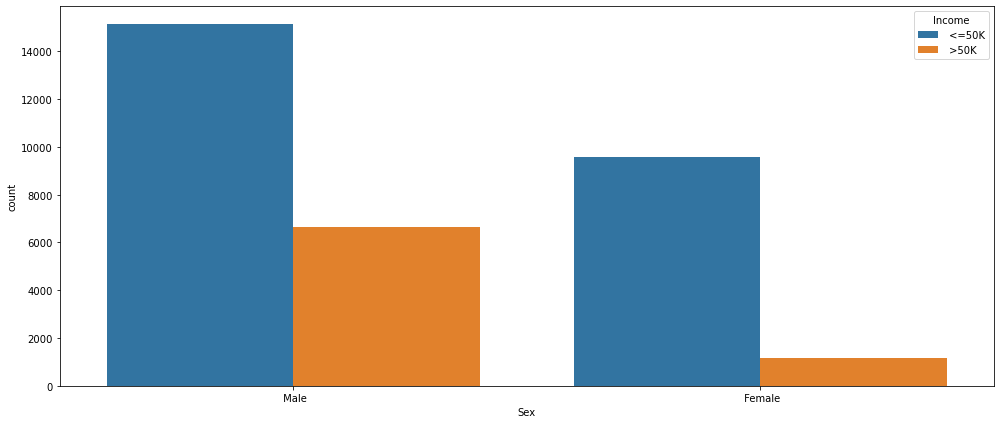

In [43]:
fig = plt.figure(figsize=(14,6))
sns.countplot('Sex', hue='Income', data=df)
plt.tight_layout()
plt.show()

We can see the distribution of Income based on Sex here.

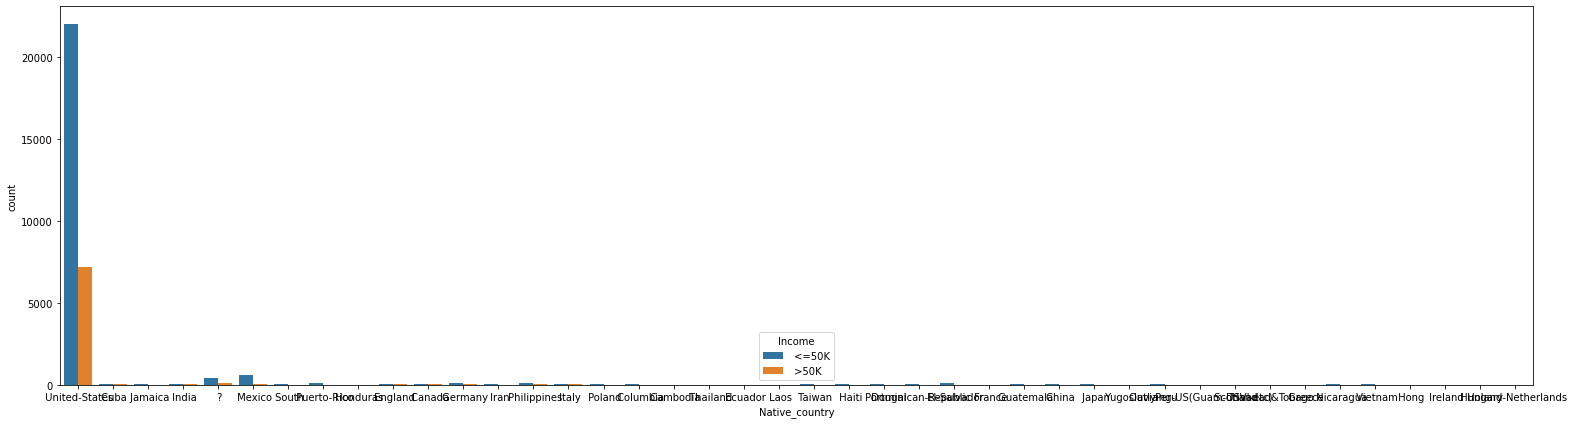

In [44]:
fig = plt.figure(figsize=(22,6))
sns.countplot('Native_country', hue='Income', data=df)
plt.tight_layout()
plt.show()

We can see the distribution of Income based on Native_country here.

### Feature Engineering

Here, I am converting the values in Sex and Income columns to numbers.

In [45]:
#before encoding
df['Sex']

0           Male
1           Male
2           Male
3         Female
4         Female
          ...   
32555     Female
32556       Male
32557     Female
32558       Male
32559     Female
Name: Sex, Length: 32560, dtype: object

In [46]:
#before encoding
df['Income']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32555     <=50K
32556      >50K
32557     <=50K
32558     <=50K
32559      >50K
Name: Income, Length: 32560, dtype: object

In [47]:
from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()
for column in df.columns:
    df['Sex'] = labelencoder.fit_transform(df["Sex"])
    df['Income'] = labelencoder.fit_transform(df["Income"])

In [48]:
#after encoding
df['Sex']

0        1
1        1
2        1
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    1
32559    0
Name: Sex, Length: 32560, dtype: int64

We can see that Male is replaced with '1' and Female is replaced with '0' after encoding.

In [49]:
#after encoding
df['Income']

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int64

We can see that Income >50K  is replaced with '1' and Income <=50K is replaced with '0' after encoding.

<br><br>**Age**<br><br>
We can see that 'Age' is a continous feature, there is a problem with continous variables in Machine Learning Models.In this case, we need to convert these continous values into categorical values.


In [50]:
df['Age'].unique()

array([50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43, 54,
       35, 59, 56, 19, 39, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [51]:
df['Age'].nunique()

73

We can see that there are 73 unique values in Age.

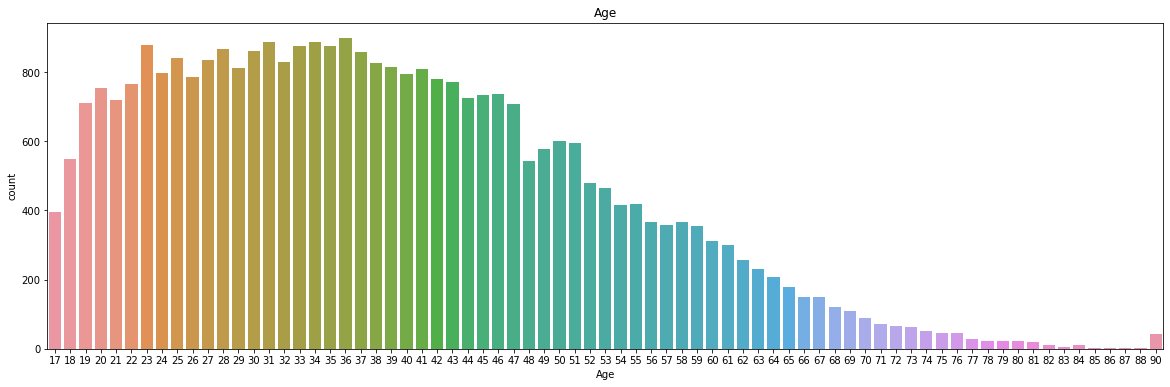

In [52]:
plt.subplots(figsize=(20,6))
sns.countplot('Age',data=df)
plt.title('Age')
plt.show()

In [53]:
df['Age'].max()

90

In [54]:
df['Age'].min()

17

We can see that the maximum age is 90 and the minimum age is 17. So lets divide the range from 0-90 into 6 bins with size 17.

In [55]:
df['Age_bin'] = 0
df.loc[df['Age']<17,'Age_bin'] = 0
df.loc[(df['Age']>17) & (df['Age']<=34),'Age_bin'] =1
df.loc[(df['Age']>34) & (df['Age']<=51),'Age_bin'] =2
df.loc[(df['Age']>51) & (df['Age']<=68),'Age_bin'] =3
df.loc[(df['Age']>68) & (df['Age']<=85),'Age_bin'] =4
df.loc[df['Age']>85,'Age_bin'] =5

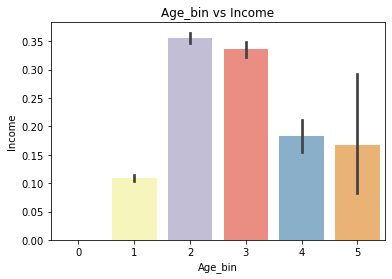

In [56]:
sns.barplot('Age_bin','Income', data=df, palette='Set3')
plt.title('Age_bin vs Income')
plt.show()

### Outliers

<AxesSubplot:xlabel='Income', ylabel='Age'>

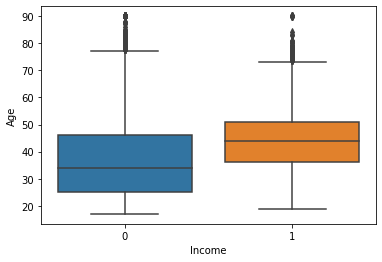

In [57]:
sns.boxplot(y='Age',x='Income',data=df)

<AxesSubplot:xlabel='Income', ylabel='Hours_per_week'>

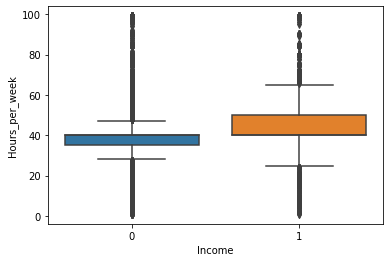

In [58]:
sns.boxplot(y='Hours_per_week',x='Income',data=df)

<AxesSubplot:xlabel='Income', ylabel='Capital_gain'>

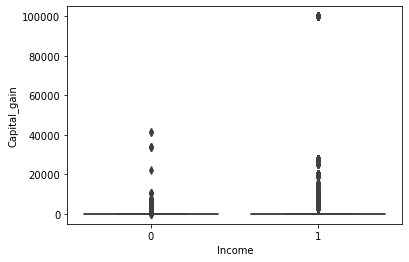

In [59]:
sns.boxplot(y='Capital_gain',x='Income',data=df)

<AxesSubplot:xlabel='Income', ylabel='Capital_loss'>

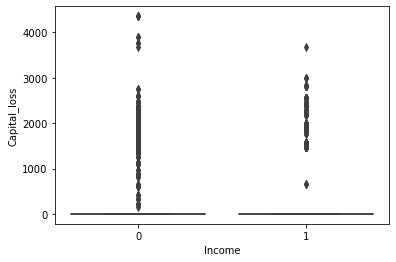

In [60]:
sns.boxplot(y='Capital_loss',x='Income',data=df)

<AxesSubplot:xlabel='Income', ylabel='Sex'>

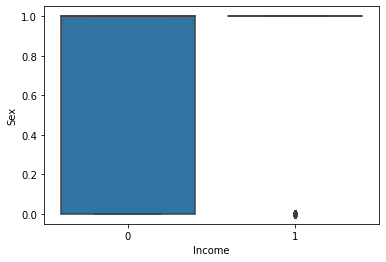

In [61]:
sns.boxplot(y='Sex',x='Income',data=df)

<AxesSubplot:xlabel='Income', ylabel='Relationship'>

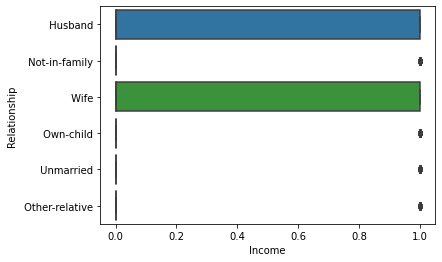

In [62]:
sns.boxplot(y='Relationship',x='Income',data=df)

<AxesSubplot:xlabel='Income', ylabel='Fnlwgt'>

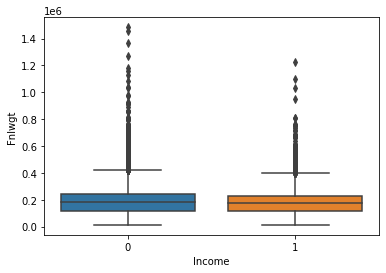

In [63]:
sns.boxplot(y='Fnlwgt',x='Income',data=df)

<AxesSubplot:xlabel='Race', ylabel='Income'>

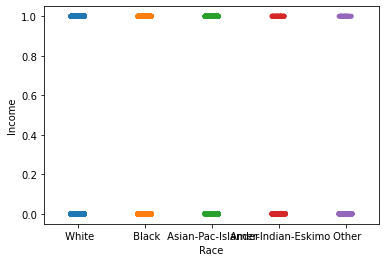

In [64]:
sns.stripplot(y="Income",x="Race",data=df)

Text(0.5, 0, 'Native_country')

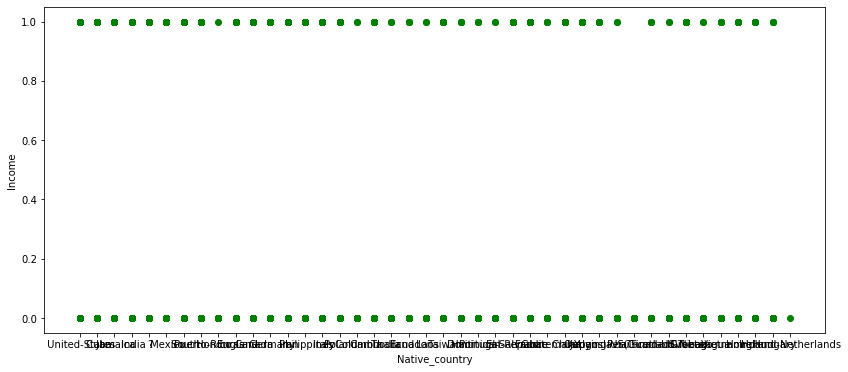

In [65]:
plt.subplots(figsize=(14,6))
plt.scatter(df["Native_country"],df["Income"],c="g") 
plt.ylabel("Income")
plt.xlabel("Native_country")

**Encoding**

In [75]:
from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()
for column in df.columns:
    df['Workclass'] = labelencoder.fit_transform(df["Workclass"])
    df['Marital_status'] = labelencoder.fit_transform(df["Marital_status"])
    df['Occupation'] = labelencoder.fit_transform(df["Occupation"])
    df['Education'] = labelencoder.fit_transform(df["Education"])

**Dropping the columns which do not affect the prediction**

In [76]:
dummy_df=df.drop(columns=["Relationship","Race","Native_country", "Capital_gain", "Capital_loss"])

**Checking correlation now**

<AxesSubplot:>

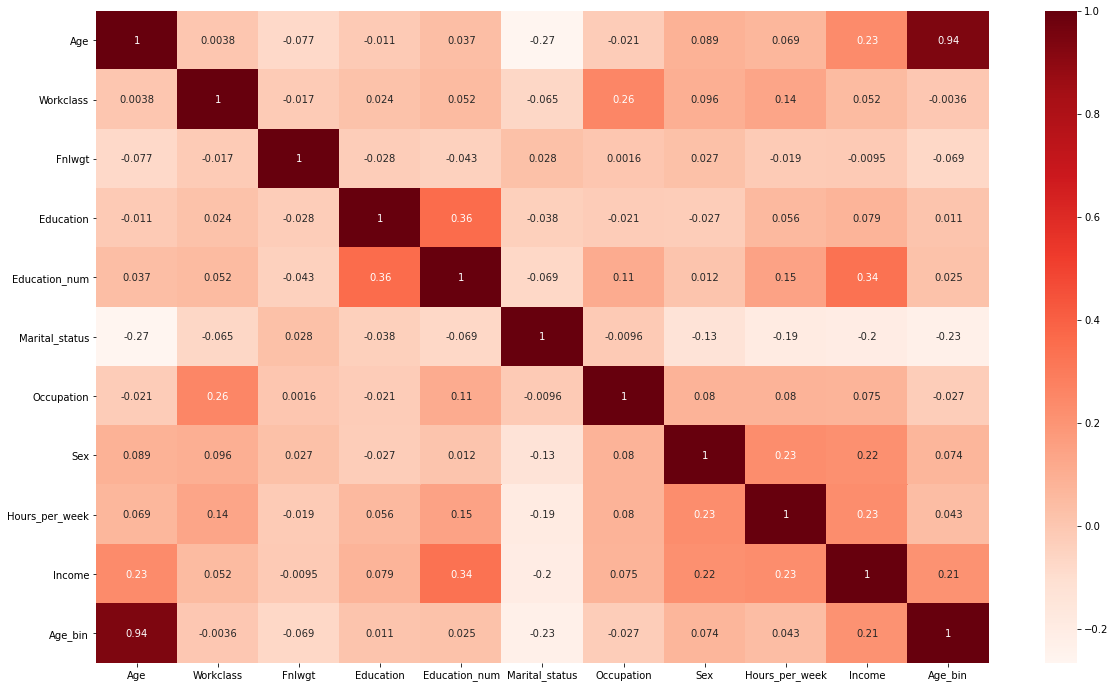

In [77]:
corr = dummy_df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr,cmap='Reds',annot=True)

**Skewness**

In [78]:
dummy_df.skew()

Age               0.558738
Workclass        -0.752280
Fnlwgt            1.446972
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Sex              -0.719244
Hours_per_week    0.227636
Income            1.212383
Age_bin           0.629579
dtype: float64

We can see that there is moderate skewness in some of the columns of the data. I am not applying skewness correction methods as this skewness might be due to the disparity in Income distribution.

### Predictive Modeling

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import GridSearchCV

**Splitting data for validation**

In [80]:
X=dummy_df.drop(['Income'], axis=1)
y=dummy_df['Income']

In [81]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [82]:
print(X_train.shape, y_train.shape)

(22792, 10) (22792,)


**-----> Checking Accuracies**

**Logistic Regression**

In [83]:
model_log = LogisticRegression(solver='liblinear')
model_log.fit(X_train, y_train)
prediction_log = model_log.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction_log, y_test))

The accuracy of the Logistic Regression is 0.7570638820638821


**Decision Tree**

In [84]:
model_tree = DecisionTreeClassifier() 
model_tree.fit(X_train, y_train)
prediction_tree = model_tree.predict(X_test)
print('The accuracy of the Decision Tree is ', metrics.accuracy_score(prediction_tree, y_test))

The accuracy of the Decision Tree is  0.7655610155610155


**K-Nearest Neighbours(KNN)**

In [85]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
prediction_knn = model_knn.predict(X_test)
print('The accuracy of the  K-Nearest Neighbours is ', metrics.accuracy_score(prediction_knn, y_test))

The accuracy of the  K-Nearest Neighbours is  0.717956592956593


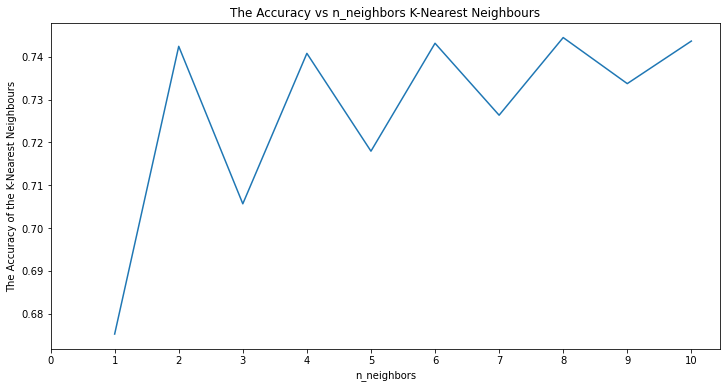

In [86]:
s =pd.Series()
for i in list(range(1,11)):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(X_train, y_train)
    prediction_knn = model_knn.predict(X_test)
    s = s.append(pd.Series(metrics.accuracy_score(prediction_knn, y_test)))

plt.plot(list(range(1,11)), s)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.title('The Accuracy vs n_neighbors K-Nearest Neighbours')
plt.xlabel('n_neighbors')
plt.ylabel('The Accuracy of the K-Nearest Neighbours')
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

**Random Forest**

In [87]:
model_random = RandomForestClassifier(n_estimators=300)
model_random.fit(X_train, y_train)
predict_random = model_random.predict(X_test)
print('The accuracy of the  Random Forest is ', metrics.accuracy_score(predict_random, y_test))

The accuracy of the  Random Forest is  0.8207411957411958


**Gaussian Naive Bayes**

In [88]:
model_gaus = GaussianNB()
model_gaus.fit(X_train, y_train)
prediction_gaus = model_gaus.predict(X_test)
print('The accuracy of the  Gaussian Naive Bayes is ', metrics.accuracy_score(prediction_gaus, y_test))

The accuracy of the  Gaussian Naive Bayes is  0.7861384111384111


**-----> Checking Cross Validation Scores**

In [89]:
from sklearn.model_selection import KFold
from  sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [90]:
kfold =KFold(n_splits=10, random_state=22)
xyz = []
accuracy = []
std = []

In [91]:
classifiers = ['Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes' , 'Random Forest']
models = [LogisticRegression(solver='liblinear'), KNeighborsClassifier(n_neighbors=9), 
      DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=300)]


models = [LogisticRegression(solver='liblinear'), KNeighborsClassifier(n_neighbors=9), 
      DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=300)]

In [92]:
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv=kfold,scoring='accuracy')
    cv_result =cv_result
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)

In [93]:
models_data_frame = pd.DataFrame({'Cross Validation Score Mean': xyz}, index=classifiers)
models_data_frame

,Cross Validation Score Mean
Logistic Regression,0.759183
KNN,0.740018
Decision Tree,0.773311
Naive Bayes,0.789343
Random Forest,0.824447


**Confusion Matrix for the above models**

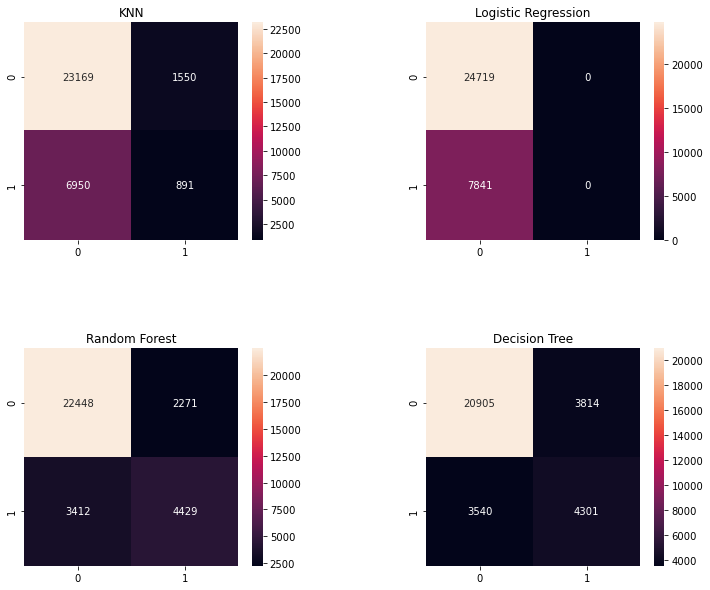

In [94]:
f, ax  =plt.subplots(2,2, figsize=(12,10))

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9) ,X,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[0,0], annot=True,fmt='2.0f')
ax[0,0].set_title('KNN')

y_pred = cross_val_predict(LogisticRegression(solver='liblinear') ,X,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[0,1], annot=True,fmt='2.0f')
ax[0,1].set_title('Logistic Regression')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=300) ,X,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[1,0], annot=True,fmt='2.0f')
ax[1,0].set_title('Random Forest')

y_pred = cross_val_predict(DecisionTreeClassifier() ,X,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred), ax=ax[1,1], annot=True,fmt='2.0f')
ax[1,1].set_title('Decision Tree')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

Text(0.5, 1.0, 'Naive Bayes')

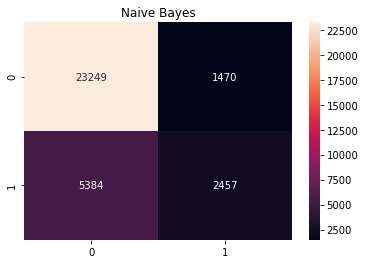

In [95]:
y_pred = cross_val_predict(GaussianNB() ,X,y,cv=5)
sns.heatmap(confusion_matrix(y,y_pred), annot=True,fmt='2.0f')
plt.title('Naive Bayes')

### ROC Curve

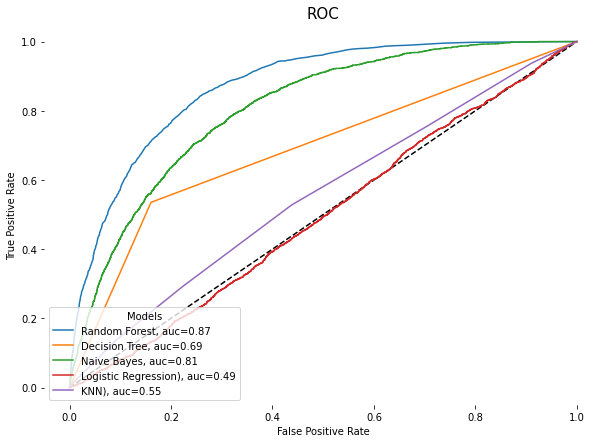

In [96]:
y_pred_proba_RF = model_random.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba_RF)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba_RF)

y_pred_proba_DT = model_tree.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba_DT)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba_DT)

y_pred_proba_NB = model_gaus.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba_NB)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba_NB)

y_pred_proba_LR = model_log.predict_proba(X_test)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(y_test,  y_pred_proba_LR)
auc4 = metrics.roc_auc_score(y_test, y_pred_proba_LR)

y_pred_proba_KNN = model_knn.predict_proba(X_test)[::,1]
fpr5, tpr5, _ = metrics.roc_curve(y_test,  y_pred_proba_KNN)
auc5 = metrics.roc_auc_score(y_test, y_pred_proba_KNN)



plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Random Forest, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="Decision Tree, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="Naive Bayes, auc="+str(round(auc3,2)))
plt.plot(fpr4,tpr4,label="Logistic Regression), auc="+str(round(auc4,2)))
plt.plot(fpr5,tpr5,label="KNN), auc="+str(round(auc5,2)))

plt.legend(loc=3, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

### Hyper Parameter Tuning

**Finding the best parameters for three models.**

**---> Random Forest Model**

In [97]:
n_estimator =range(50, 1000, 50)
hyper = {'n_estimators': n_estimator}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed: 41.4min finished


0.8261977886977887
RandomForestClassifier(n_estimators=800, random_state=0)


In [98]:
gd.best_params_

{'n_estimators': 800}

In [99]:
from sklearn.metrics import r2_score, mean_squared_error
best_reg = gd.best_estimator_
y_pred = best_reg.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

0.0

**--->Logistic Regression**

In [101]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(X, y)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 1e-05}
Best score is 0.7591830466830467


**--->Decision Tree Regression Model**

In [102]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [103]:
tuning_model=GridSearchCV(model_tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [104]:
# function for calculating how much time take for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        #print(thour,":",tmin,':',round(tsec,2))

In [105]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [110]:
from sklearn.tree import DecisionTreeRegressor
tuned_hyper_model= DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=50,min_samples_leaf=2,min_weight_fraction_leaf=0.1,splitter='random')

In [111]:
# fitting model

tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto', max_leaf_nodes=50,
                      min_samples_leaf=2, min_weight_fraction_leaf=0.1,
                      splitter='random')

In [112]:
# prediction 

tuned_pred=tuned_hyper_model.predict(X_test)

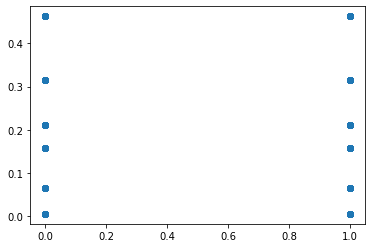

In [113]:
plt.scatter(y_test,tuned_pred)

In [114]:
# With hyperparameter tuned Decision Tree Model

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))

MAE: 0.31535547106783796
MSE: 0.1584989770456329
RMSE: 0.39811930001650625


We can see that we got best accuracy score of 0.8261977886977887 with Random Forest Model<br>

### Predictions

In [116]:
OutputDF=pd.DataFrame({'Actual Data':y_test,'Predicted Data':y_pred})
OutputDF.head()

,Actual Data,Predicted Data
14160,0,0
27047,0,0
28867,1,1
5667,1,1
7827,0,0


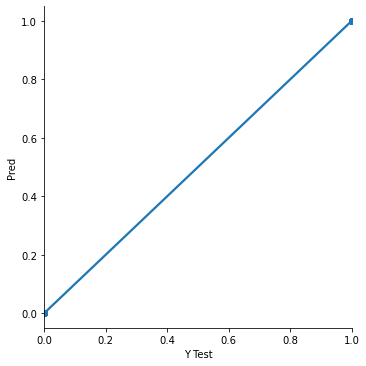

In [119]:
OutputDF = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=OutputDF,palette='rainbow')

### Saving the Model

In [120]:
import joblib

In [121]:
joblib.dump(model_random, 'Census_Income_Prediction.pkl')

['Census_Income_Prediction.pkl']

In [123]:
# Load the model from the file
model_random_from_joblib = joblib.load('Census_Income_Prediction.pkl')

In [124]:
# Use the loaded model to make predictions
model_random_from_joblib.predict(X_test)

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)